# House Price Prediction

<p><b>Status: <span style=color:green;>Completed</span></b></p>

##### LOAD THE DATA

In [1]:
import pandas as pd
import numpy as np

header = ['CRIM','ZN','INDUS','CHAS','NOX',
          'RM','AGE','DIS','RAD','TAX','PTRATIO',
          'B','LSTST','MEDV']

X = pd.read_csv('../../../data/housing.data', names=header, sep='\s+', header=None)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTST,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


##### DATA OVERVIEW

In [2]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTST,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


##### APPLY STANDARIZATION AND VISUALIZE THE RELATIONSHIP AMOUNG SOME FEATURES

C:\Users\gerardo.paniagua\AppData\Local\Temp\ipykernel_23432\4291947658.py:21: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X[:] = scaler.transform(X)


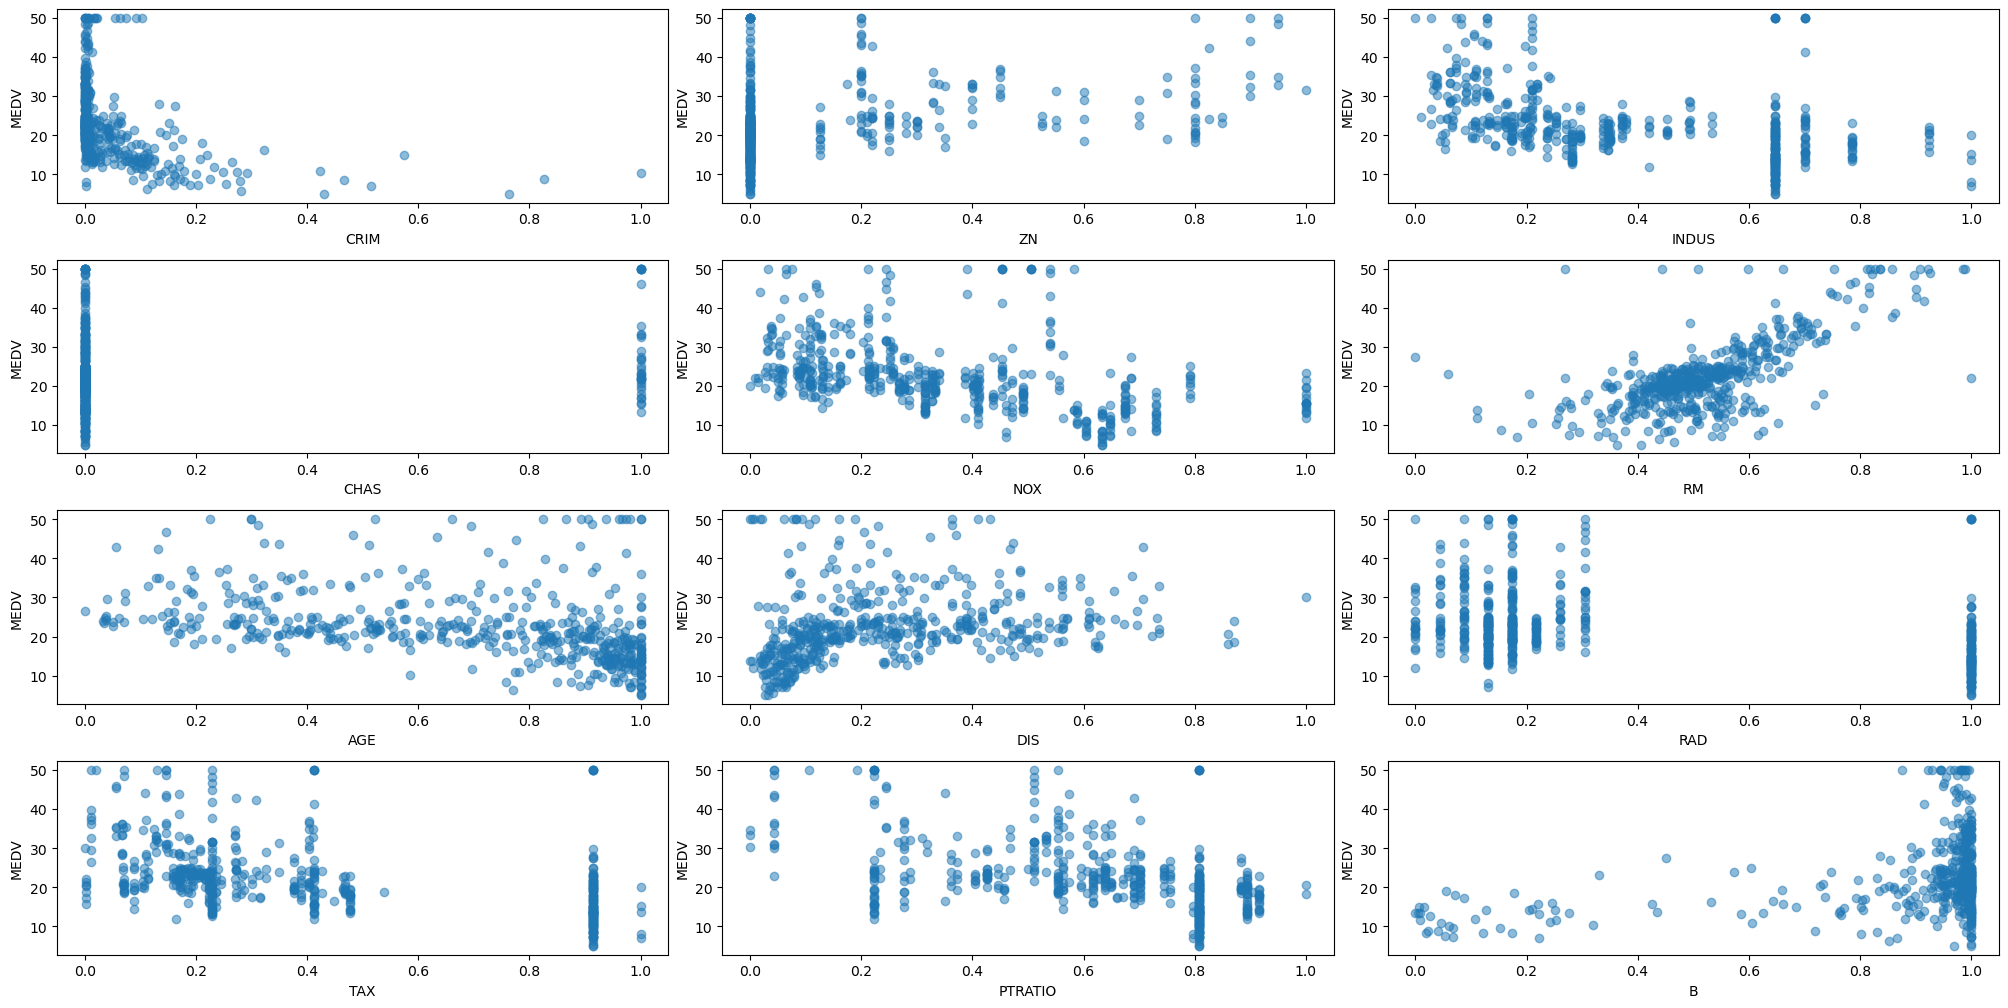

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTST
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.040544,0.113636,0.391378,0.069170,0.349167,0.521869,0.676364,0.242381,0.371713,0.422208,0.622929,0.898568,0.301409
std,0.096679,0.233225,0.251479,0.253994,0.238431,0.134627,0.289896,0.191482,0.378576,0.321636,0.230313,0.230205,0.197049
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000851,0.000000,0.173387,0.000000,0.131687,0.445392,0.433831,0.088259,0.130435,0.175573,0.510638,0.945730,0.144040
50%,0.002812,0.000000,0.338343,0.000000,0.314815,0.507281,0.768280,0.188949,0.173913,0.272901,0.686170,0.986232,0.265728
75%,0.041258,0.125000,0.646628,0.000000,0.491770,0.586798,0.938980,0.369088,1.000000,0.914122,0.808511,0.998298,0.420116
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# separate feature data and target
Y = X['MEDV'].copy()
X = X.drop(columns=['MEDV'])


# apply standarization to the feature dat
#scaler = StandardScaler()
#scaler = scaler.fit(X)
#X[:] = scaler.transform(X)


scaler = MinMaxScaler(feature_range=(0,1))
scaler = scaler.fit(X)
X[:] = scaler.transform(X)


# plot with various axes scales
rows = 4 ; cols = 3
f, ax = plt.subplots(rows, cols, figsize=(20,10))

for _row in range(rows):
    for _col in range(cols):
        col_name = X.columns[(_row*cols) + _col]
        ax[_row, _col].scatter(X[col_name], Y, alpha=0.5)
        ax[_row, _col].set_xlabel(col_name)
        ax[_row, _col].set_ylabel('MEDV')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

X.describe()

##### SPLIT THE DATA

In [4]:
from sklearn.model_selection import train_test_split

# set the seed for reproducibility
np.random.seed(127)

# split the dataset into 2 training and 2 testing sets
X_train, X_test, y_train, y_test = train_test_split(X.values, Y.values.reshape(-1,1), test_size=0.2, random_state=13)

print ("Shape of (X_train, X_test, y_train, y_test)")
print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Shape of (X_train, X_test, y_train, y_test)
(404, 13) (102, 13) (404, 1) (102, 1)


##### DEFINE NETWORK PARAMETERS

In [5]:
# define number of attributes
n_features = X_train.shape[1]
n_classes = 1  # quantitative data

# count number of samples in each set of data
n_train = X_train.shape[0]
n_test = X_test.shape[0]

# define amount of neurons
n_layer_in = n_features  # 12 neurons in input layer
n_layer_h1 = 50          # first  hidden layer
n_layer_h2 = 50          # second hidden layer
n_layer_h3 = 50          # third hidden layer
n_layer_out = n_classes  # 1 neurons in output layer

sigma_init = 0.01   # For randomized initialization


##### MODEL ARCHITECTURE

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(n_layer_h1, activation='relu', input_shape=(n_features,)))
model.add(Dropout(0.10))
model.add(Dense(n_layer_h2, activation='relu'))
model.add(Dropout(0.20))
model.add(Dense(n_layer_h3, activation='relu'))
model.add(Dropout(0.30))
model.add(Dense(n_classes))

model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])

# show model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                700       
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 5

##### VISUALIZE NEURAL NETWORK ARCHITECTURE

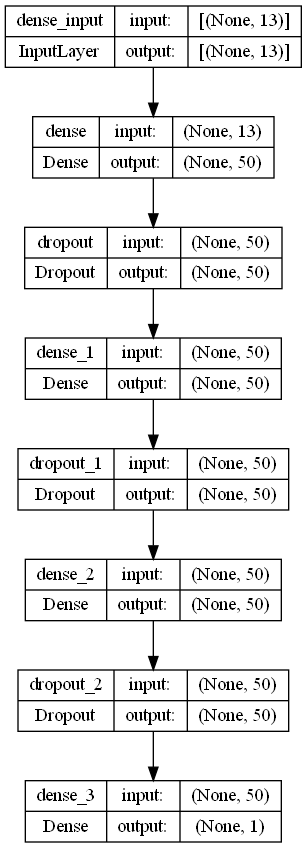

In [7]:
# extra code – another way to display the model's architecture
tf.keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

##### EXECUTE MODEL TRAINING

In [8]:
from tensorflow.keras.callbacks import History 

history = History()
model.fit(X_train, y_train, epochs=400, callbacks=[history])
model.evaluate(X_test, y_test)

Epoch 1/400
13/13 [==============================] - 1s 2ms/step - loss: 577.9330 - mae: 22.2240 - mse: 577.9330
Epoch 2/400
13/13 [==============================] - 0s 2ms/step - loss: 527.5178 - mae: 20.9604 - mse: 527.5178
Epoch 3/400
13/13 [==============================] - 0s 2ms/step - loss: 431.8888 - mae: 18.4194 - mse: 431.8888
Epoch 4/400
13/13 [==============================] - 0s 2ms/step - loss: 282.9461 - mae: 13.8025 - mse: 282.9461
Epoch 5/400
13/13 [==============================] - 0s 2ms/step - loss: 173.2680 - mae: 10.4520 - mse: 173.2680
Epoch 6/400
13/13 [==============================] - 0s 2ms/step - loss: 144.4285 - mae: 9.5063 - mse: 144.4285
Epoch 7/400
13/13 [==============================] - 0s 2ms/step - loss: 122.1702 - mae: 8.5425 - mse: 122.1702
Epoch 8/400
13/13 [==============================] - 0s 2ms/step - loss: 112.5384 - mae: 8.0659 - mse: 112.5384
Epoch 9/400
13/13 [==============================] - 0s 2ms/step - loss: 89.4287 - mae: 7.2161 - ms

13/13 [==============================] - 0s 2ms/step - loss: 26.2736 - mae: 3.7123 - mse: 26.2736
Epoch 75/400
13/13 [==============================] - 0s 2ms/step - loss: 32.4873 - mae: 4.0107 - mse: 32.4873
Epoch 76/400
13/13 [==============================] - 0s 2ms/step - loss: 29.6759 - mae: 3.8471 - mse: 29.6759
Epoch 77/400
13/13 [==============================] - 0s 2ms/step - loss: 30.7087 - mae: 4.0277 - mse: 30.7087
Epoch 78/400
13/13 [==============================] - 0s 2ms/step - loss: 27.5178 - mae: 3.8304 - mse: 27.5178
Epoch 79/400
13/13 [==============================] - 0s 2ms/step - loss: 28.6243 - mae: 3.9624 - mse: 28.6243
Epoch 80/400
13/13 [==============================] - 0s 2ms/step - loss: 26.3309 - mae: 3.9092 - mse: 26.3309
Epoch 81/400
13/13 [==============================] - 0s 2ms/step - loss: 27.5404 - mae: 3.7910 - mse: 27.5404
Epoch 82/400
13/13 [==============================] - 0s 1ms/step - loss: 27.4044 - mae: 3.8388 - mse: 27.4044
Epoch 83/400
1

13/13 [==============================] - 0s 1ms/step - loss: 22.0306 - mae: 3.5400 - mse: 22.0306
Epoch 148/400
13/13 [==============================] - 0s 1ms/step - loss: 24.0733 - mae: 3.6361 - mse: 24.0733
Epoch 149/400
13/13 [==============================] - 0s 2ms/step - loss: 20.3086 - mae: 3.4964 - mse: 20.3086
Epoch 150/400
13/13 [==============================] - 0s 1ms/step - loss: 21.7430 - mae: 3.5093 - mse: 21.7430
Epoch 151/400
13/13 [==============================] - 0s 1ms/step - loss: 23.4628 - mae: 3.6212 - mse: 23.4628
Epoch 152/400
13/13 [==============================] - 0s 2ms/step - loss: 23.7953 - mae: 3.6381 - mse: 23.7953
Epoch 153/400
13/13 [==============================] - 0s 1ms/step - loss: 24.3982 - mae: 3.7197 - mse: 24.3982
Epoch 154/400
13/13 [==============================] - 0s 2ms/step - loss: 21.9630 - mae: 3.5457 - mse: 21.9630
Epoch 155/400
13/13 [==============================] - 0s 2ms/step - loss: 21.8769 - mae: 3.4976 - mse: 21.8769
Epoch 

13/13 [==============================] - 0s 2ms/step - loss: 20.5526 - mae: 3.2457 - mse: 20.5526
Epoch 221/400
13/13 [==============================] - 0s 1ms/step - loss: 19.6727 - mae: 3.3125 - mse: 19.6727
Epoch 222/400
13/13 [==============================] - 0s 2ms/step - loss: 20.2472 - mae: 3.3370 - mse: 20.2472
Epoch 223/400
13/13 [==============================] - 0s 2ms/step - loss: 20.2098 - mae: 3.3268 - mse: 20.2098
Epoch 224/400
13/13 [==============================] - 0s 1ms/step - loss: 18.7042 - mae: 3.2633 - mse: 18.7042
Epoch 225/400
13/13 [==============================] - 0s 2ms/step - loss: 20.5058 - mae: 3.3763 - mse: 20.5058
Epoch 226/400
13/13 [==============================] - 0s 1ms/step - loss: 18.4710 - mae: 3.2343 - mse: 18.4710
Epoch 227/400
13/13 [==============================] - 0s 1ms/step - loss: 19.6397 - mae: 3.4265 - mse: 19.6397
Epoch 228/400
13/13 [==============================] - 0s 2ms/step - loss: 19.3139 - mae: 3.3008 - mse: 19.3139
Epoch 

13/13 [==============================] - 0s 1ms/step - loss: 19.9341 - mae: 3.3154 - mse: 19.9341
Epoch 294/400
13/13 [==============================] - 0s 1ms/step - loss: 19.2408 - mae: 3.1538 - mse: 19.2408
Epoch 295/400
13/13 [==============================] - 0s 2ms/step - loss: 21.3085 - mae: 3.2198 - mse: 21.3085
Epoch 296/400
13/13 [==============================] - 0s 2ms/step - loss: 17.7848 - mae: 3.2495 - mse: 17.7848
Epoch 297/400
13/13 [==============================] - 0s 1ms/step - loss: 19.7718 - mae: 3.3965 - mse: 19.7718
Epoch 298/400
13/13 [==============================] - 0s 2ms/step - loss: 19.3608 - mae: 3.2504 - mse: 19.3608
Epoch 299/400
13/13 [==============================] - 0s 2ms/step - loss: 17.4149 - mae: 3.1663 - mse: 17.4149
Epoch 300/400
13/13 [==============================] - 0s 2ms/step - loss: 19.4451 - mae: 3.2434 - mse: 19.4451
Epoch 301/400
13/13 [==============================] - 0s 2ms/step - loss: 18.1461 - mae: 3.2395 - mse: 18.1461
Epoch 

13/13 [==============================] - 0s 2ms/step - loss: 17.8784 - mae: 3.0148 - mse: 17.8784
Epoch 367/400
13/13 [==============================] - 0s 2ms/step - loss: 16.7562 - mae: 3.0789 - mse: 16.7562
Epoch 368/400
13/13 [==============================] - 0s 2ms/step - loss: 16.6263 - mae: 3.0954 - mse: 16.6263
Epoch 369/400
13/13 [==============================] - 0s 2ms/step - loss: 19.6391 - mae: 3.3036 - mse: 19.6391
Epoch 370/400
13/13 [==============================] - 0s 2ms/step - loss: 17.7633 - mae: 3.1192 - mse: 17.7633
Epoch 371/400
13/13 [==============================] - 0s 2ms/step - loss: 20.0303 - mae: 3.1959 - mse: 20.0303
Epoch 372/400
13/13 [==============================] - 0s 2ms/step - loss: 18.9143 - mae: 3.2392 - mse: 18.9143
Epoch 373/400
13/13 [==============================] - 0s 1ms/step - loss: 17.7253 - mae: 3.1421 - mse: 17.7253
Epoch 374/400
13/13 [==============================] - 0s 1ms/step - loss: 17.0480 - mae: 3.1222 - mse: 17.0480
Epoch 

[8.079800605773926, 2.191309690475464, 8.079800605773926]

##### PRINTING RAW OUTPUT

In [9]:
prediction = model.predict(X_test)
prediction

4/4 [==============================] - 0s 4ms/step


array([[12.173284 ],
       [17.435633 ],
       [19.965294 ],
       [26.017624 ],
       [20.183598 ],
       [22.680204 ],
       [21.70292  ],
       [11.036987 ],
       [23.685608 ],
       [10.091795 ],
       [19.20605  ],
       [17.990032 ],
       [34.608654 ],
       [13.388422 ],
       [16.40939  ],
       [17.474651 ],
       [15.314247 ],
       [24.840801 ],
       [31.397684 ],
       [19.143414 ],
       [34.01719  ],
       [25.842049 ],
       [22.07531  ],
       [15.258192 ],
       [15.754279 ],
       [11.004331 ],
       [52.273365 ],
       [20.256256 ],
       [14.776769 ],
       [20.178589 ],
       [25.74409  ],
       [ 9.1451435],
       [ 9.068935 ],
       [20.530764 ],
       [18.38956  ],
       [ 9.423411 ],
       [17.765574 ],
       [17.19769  ],
       [41.879555 ],
       [14.192548 ],
       [18.179138 ],
       [22.073551 ],
       [42.666355 ],
       [ 9.881257 ],
       [16.437908 ],
       [36.757084 ],
       [14.99907  ],
       [10.15

##### EVALUATE TESTING SET

In [10]:
# Evaluate the model on the test data using `evaluate`
results = model.evaluate(X_test, y_test)

print('\nEvaluate on test data \n\n(loss), (accuracy) :\n{}'.format(results))

4/4 [==============================] - 0s 1ms/step - loss: 8.0798 - mae: 2.1913 - mse: 8.0798

Evaluate on test data 

(loss), (accuracy) :
[8.079800605773926, 2.191309690475464, 8.079800605773926]


In [11]:
print(history.history.keys())

dict_keys(['loss', 'mae', 'mse'])


##### VISUALIZE THE PREDICTION'S ACCURACY IMPROVEMENT

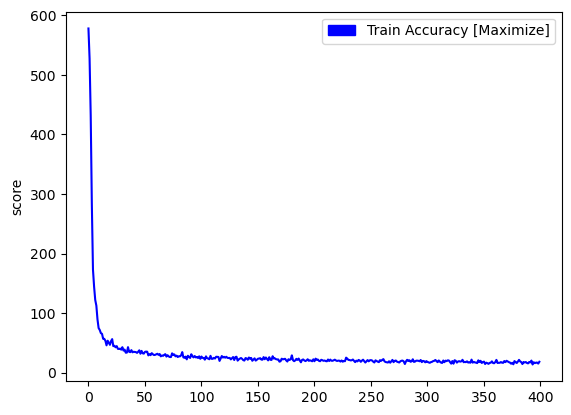

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# set up legend
blue_patch = mpatches.Patch(color='blue', label='Train Accuracy [Maximize]')
plt.legend(handles=[blue_patch])

#plot the data
plt.plot(history.history['mse'], color='blue')
plt.ylabel('score');

##### VISUALIZE THE LOSS EVOLUTION

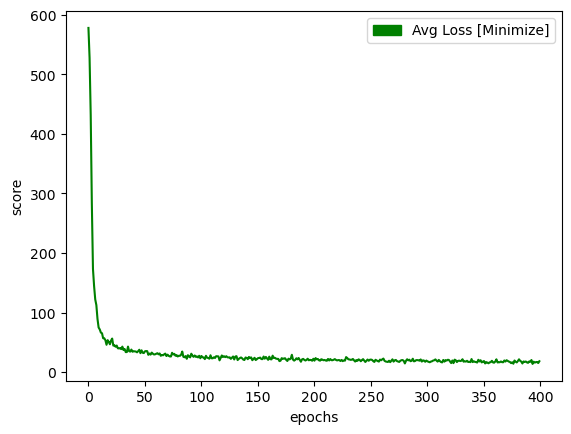

In [13]:
# set up legend
green_patch = mpatches.Patch(color='green', label='Avg Loss [Minimize]')
plt.legend(handles=[green_patch])

#plot the data
plt.plot(history.history['loss'], color='green')

plt.xlabel('epochs')
plt.ylabel('score');

##### CREATE TESTING RESULT DATAFRAME

In [14]:
dataframe = pd.DataFrame(prediction, columns=['Prediction'])
dataframe['Target'] = y_test
dataframe['AbsError'] = abs(y_test-prediction)
dataframe = dataframe.sort_values(by=['AbsError'])
dataframe

,Prediction,Target,AbsError
86,25.182091,25.2,0.017909
87,8.896079,8.8,0.096079
62,21.798643,21.7,0.098643
89,13.545557,13.4,0.145557
0,12.173284,12.0,0.173284
...,...,...,...
90,41.695969,48.3,6.604031
42,42.666355,50.0,7.333645
52,42.647396,50.0,7.352604
17,24.840801,16.8,8.040801


##### VISUALIZE THE RESULTS

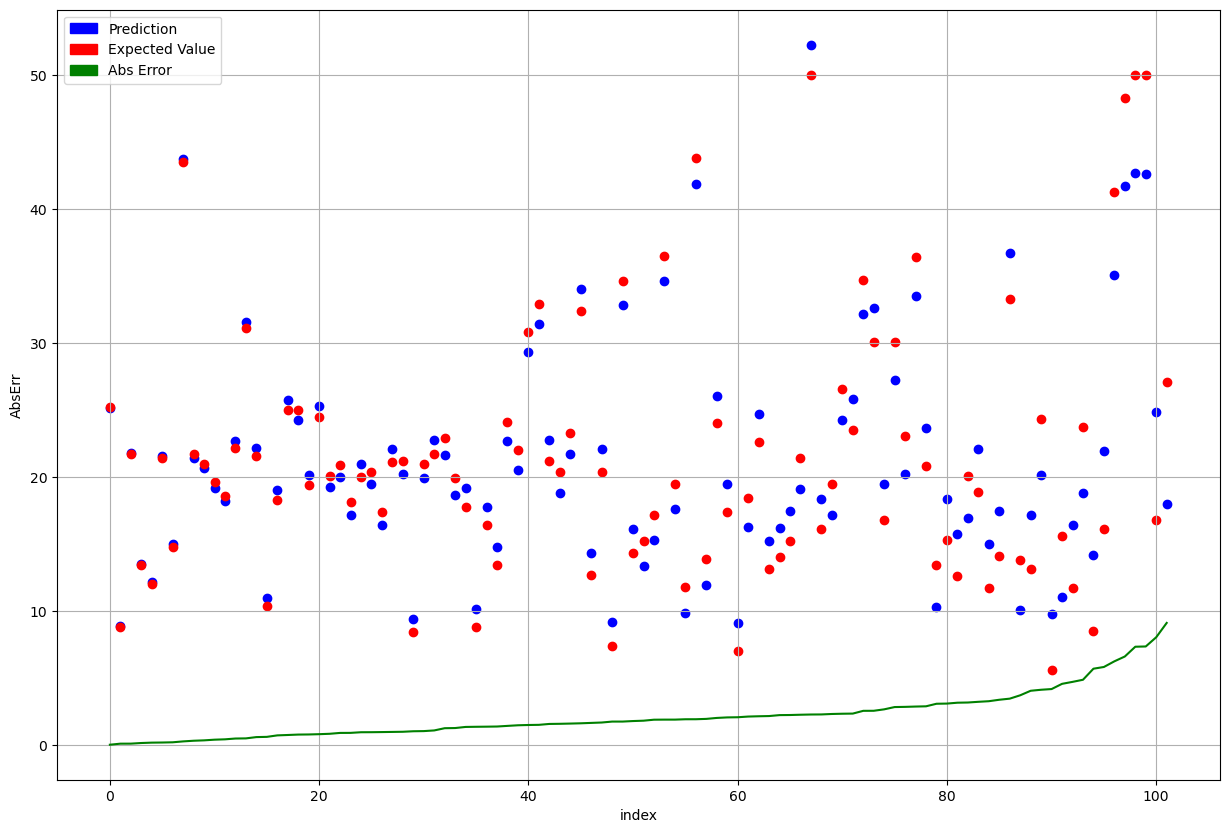

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

plt.figure(figsize=(15,10))

# define legend
blue_patch = mpatches.Patch(color='blue', label='Prediction')
red_patch = mpatches.Patch(color='red', label='Expected Value')
green_patch = mpatches.Patch(color='green', label='Abs Error')
plt.legend(handles=[blue_patch,red_patch, green_patch])

# plot data
x_array = np.arange(len(prediction))
plt.scatter(x_array, dataframe.Prediction.values, color='blue')
plt.scatter(x_array, dataframe.Target.values, color='red')

abs_error = dataframe.AbsError.values
plt.plot(x_array, dataframe.AbsError.values, color='green')
plt.grid()

# define legends
plt.xlabel('index'.format('1'))
plt.ylabel('AbsErr');